<a href="https://colab.research.google.com/github/RasanaPJ/Deep-Learning/blob/master/Sarcasm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
vocab_size=10000
embedding_dim=16
max_length=32
trunc_type='post'
padding_type='post'
oov_tok='<OOV>'
training_size=20000

In [16]:
!wget --no-check-certificate \
https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json \


--2020-01-30 05:23:18--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 2a00:1450:4013:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5643545 (5.4M) [application/json]
Saving to: ‘sarcasm.json.1’

sarcasm.json.1      100%[===================>]   5.38M  --.-KB/s    in 0.08s   

2020-01-30 05:23:18 (64.4 MB/s) - ‘sarcasm.json.1’ saved [5643545/5643545]



In [0]:
import json

In [0]:
with open("sarcasm.json", 'r') as f:
  datastore = json.load(f)


In [23]:
datastore[0:2]

[{'article_link': 'https://www.huffingtonpost.com/entry/versace-black-code_us_5861fbefe4b0de3a08f600d5',
  'headline': "former versace store clerk sues over secret 'black code' for minority shoppers",
  'is_sarcastic': 0},
 {'article_link': 'https://www.huffingtonpost.com/entry/roseanne-revival-review_us_5ab3a497e4b054d118e04365',
  'headline': "the 'roseanne' revival catches up to our thorny political mood, for better and worse",
  'is_sarcastic': 0}]

In [0]:
sentences = []
labels = []
for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])

In [0]:
training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]

In [0]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

training_sequence = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequence,maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequence = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequence, maxlen=max_length, padding= padding_type, truncating=trunc_type)


In [33]:
model = tf.keras.Sequential([
                             tf.keras.layers.Embedding(vocab_size,embedding_dim, input_length=max_length),
                             tf.keras.layers.GlobalAveragePooling1D(),
                             tf.keras.layers.Dense(24,activation='relu'),
                             tf.keras.layers.Dense(1,activation='sigmoid')

])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
___________________

In [34]:
num_epochs =30

history = model.fit(training_padded,training_labels, epochs=num_epochs, validation_data=(testing_padded,testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/30
20000/20000 - 3s - loss: 0.5786 - acc: 0.6905 - val_loss: 0.4138 - val_acc: 0.8325
Epoch 2/30
20000/20000 - 2s - loss: 0.3228 - acc: 0.8711 - val_loss: 0.3457 - val_acc: 0.8590
Epoch 3/30
20000/20000 - 2s - loss: 0.2395 - acc: 0.9064 - val_loss: 0.3423 - val_acc: 0.8560
Epoch 4/30
20000/20000 - 2s - loss: 0.1939 - acc: 0.9249 - val_loss: 0.3576 - val_acc: 0.8547
Epoch 5/30
20000/20000 - 2s - loss: 0.1608 - acc: 0.9412 - val_loss: 0.4202 - val_acc: 0.8343
Epoch 6/30
20000/20000 - 2s - loss: 0.1363 - acc: 0.9520 - val_loss: 0.4141 - val_acc: 0.8496
Epoch 7/30
20000/20000 - 2s - loss: 0.1166 - acc: 0.9592 - val_loss: 0.4509 - val_acc: 0.8456
Epoch 8/30
20000/20000 - 2s - loss: 0.1003 - acc: 0.9679 - val_loss: 0.4985 - val_acc: 0.8389
Epoch 9/30
20000/20000 - 2s - loss: 0.0880 - acc: 0.9715 - val_loss: 0.5446 - val_acc: 0.8328
Epoch 10/30
20000/20000 - 2s - loss: 0.0768 - acc: 0.9758 - val_loss: 0.5898 - val_acc: 0.8313
Epoch 11/3

In [0]:
import warnings
warnings.filterwarnings('ignore')

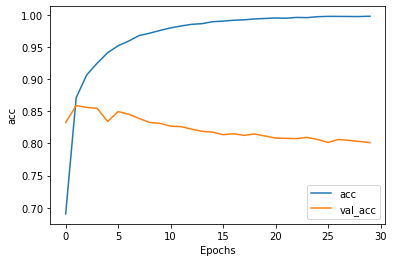

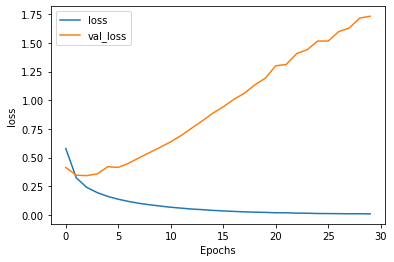

In [41]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history,"acc")
plot_graphs(history, "loss")

 Accuracy of trainig looks good but accuracy of validation doesn't look ok.
 Similarly, the loss of training is decreasing but , validation loss increases.